In [1]:
%reload_ext autoreload
%autoreload 2
%pylab inline --no-import-all

import io
import os
from pprint import pprint as pp
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

import circle
from mlp import *

sns.set_style('whitegrid')
sns.set_palette("deep")

Populating the interactive namespace from numpy and matplotlib


## Classification using MLP with distance  -4, radius   10, and width   6

---

### p.151 Figure 4.12


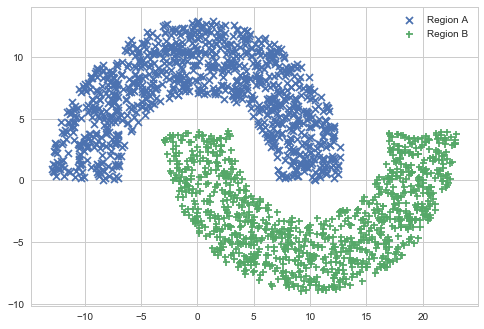

In [2]:
regionA, regionB = circle.gen_circles(10, 6, -4, 1000)
# plt.axis('equal')
plt.scatter(*regionA, marker='x', label='Region A')
plt.scatter(*regionB, marker='+', label='Region B')
plt.legend()
plt.show()

test_regionA, test_regionB = circle.gen_circles(10, 6, -4, 1000)
data_test, labels_test = circle.test_batch(test_regionA, test_regionB)

# Chapter 4 の Computer experiment

### Network Configuration

---

- 入力層 $m_0 = 2 $
- 中間層
    - $ m_1 = 20 $
- 出力層 $ m_2 = 1 $
- 活性化関数 : hyperbolic tangent defined as
$$ \phi (v) = \frac{1 - exp(-2v)}{1 + exp(-2v)}$$
- Threshold setting: zero
- Learning-rate parameter  : annealed linearly from 10-1 down to 10-5
- Max epoch : 50
- 初期化は[0, 1)の一様分布

In [3]:
%reload_ext autoreload
%autoreload 2
from mlp import *

### 入力データの標準化なし

In [ ]:
tf.reset_default_graph()
clf = circleClf(max_epoch=50, normalize=False)
clf.run(regionA, regionB, data_test, labels_test)

### 標準化する (5epochくらいで十分)

tf.reset_default_graph()
clf = circleClf(max_epoch=5, normalize=True)
clf.run(regionA, regionB, data_test, labels_test)

## Figure 4.13 

---

少し距離が縮まったもの。
若干のミス分類があるらしい。

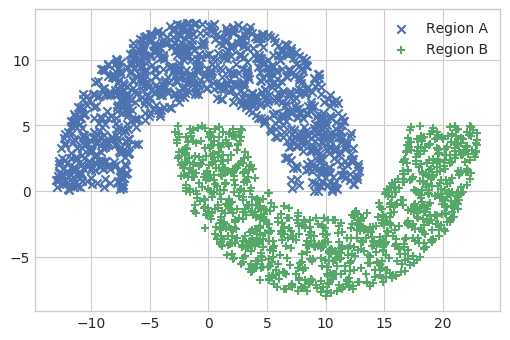

In [36]:
d = -5
regionA, regionB = circle.gen_circles(10, 6, d, 1000)
# plt.axis('equal')
plt.scatter(*regionA, marker='x', label='Region A')
plt.scatter(*regionB, marker='+', label='Region B')
plt.legend()
plt.show()

test_regionA, test_regionB = circle.gen_circles(10, 6, d, 1000)
data_test, labels_test = circle.test_batch(test_regionA, test_regionB)

### 標準化, Learning rate は線形にアニーリング

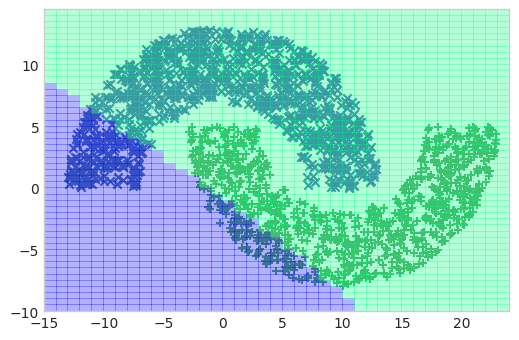

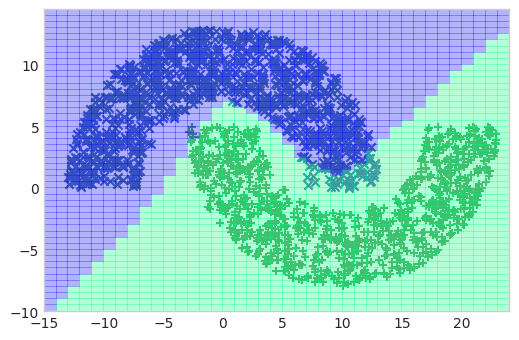

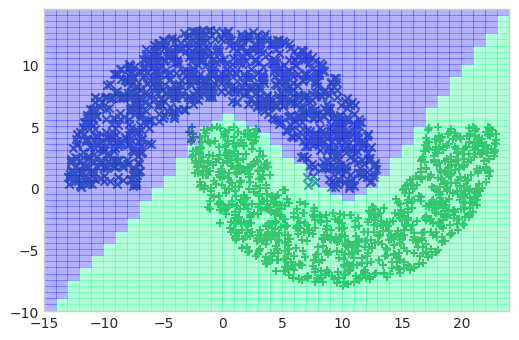

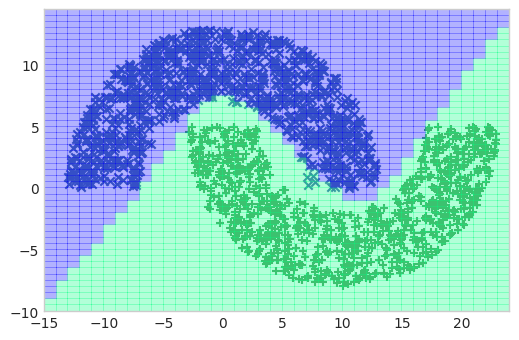

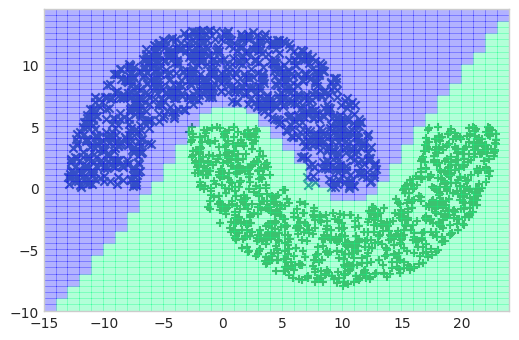

In [37]:
tf.reset_default_graph()
clf = circleClf(max_epoch=5, normalize=True)
clf.run(regionA, regionB, data_test, labels_test)

### Learning-rate parameter  : annealed exponentially from 10-1 down to 10-3

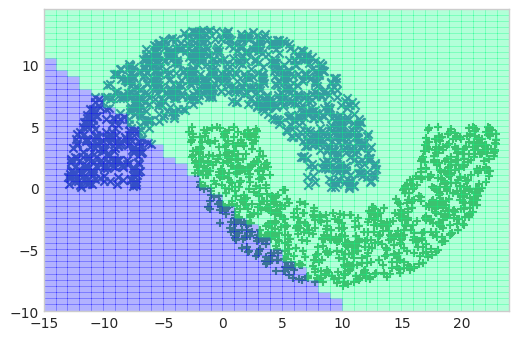

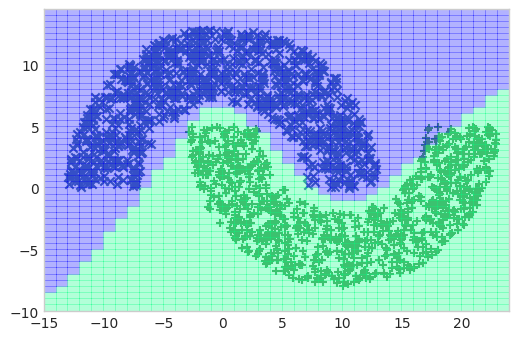

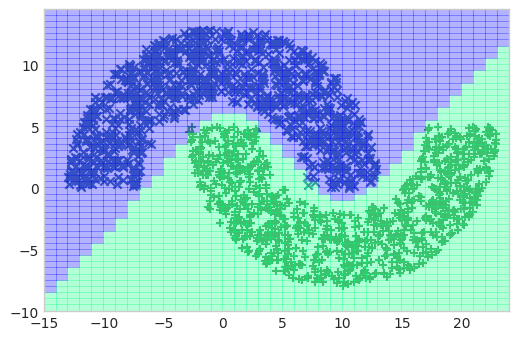

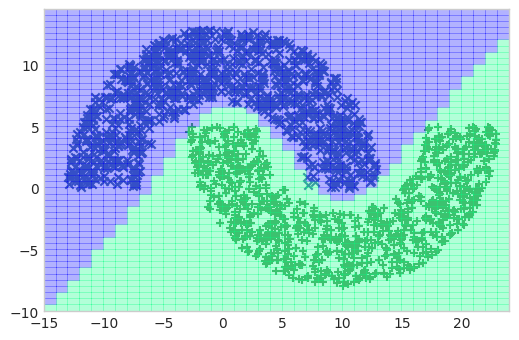

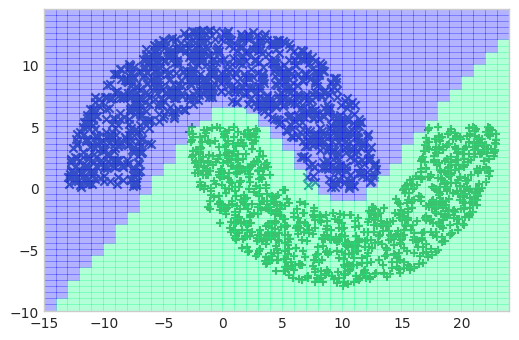

In [38]:
tf.reset_default_graph()

clf2 = circleClf2(max_epoch=5, normalize=True)
clf2.run(regionA, regionB, data_test, labels_test)

## 少し難しくしてみる

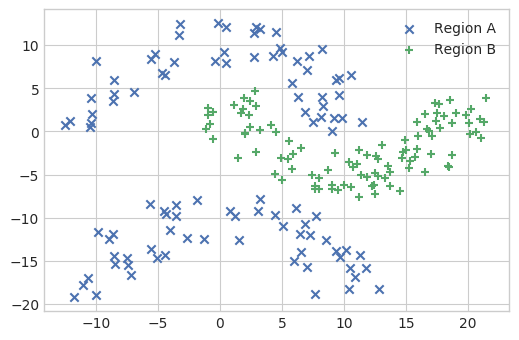

In [10]:
d = -5
regionA, regionB = circle.gen_circles2(10, 6, d, 100)
# plt.axis('equal')
plt.scatter(*regionA, marker='x', label='Region A')
plt.scatter(*regionB, marker='+', label='Region B')
plt.legend()
plt.show()

test_regionA, test_regionB = circle.gen_circles2(10, 6, d, 1000)

data_test, labels_test = circle.test_batch(test_regionA, test_regionB)

### 標準化、指数アニーリング

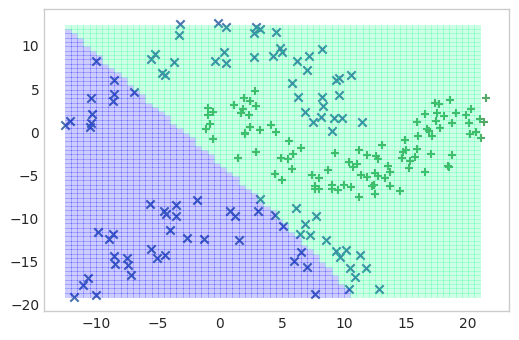

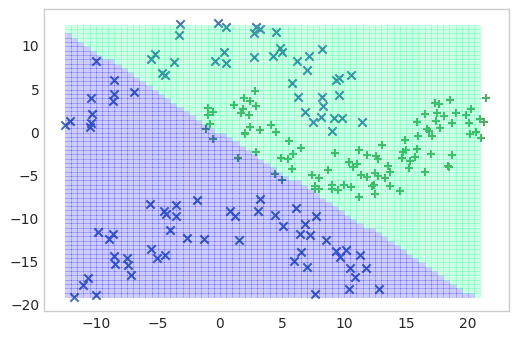

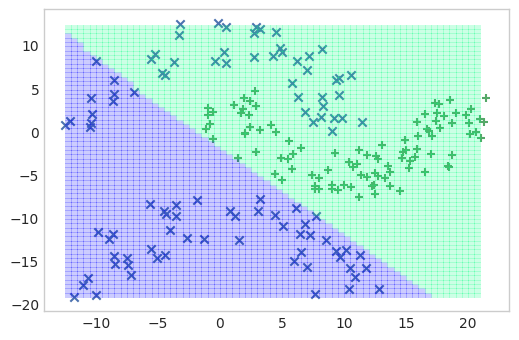

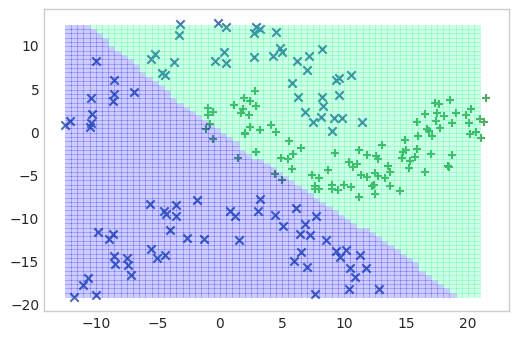

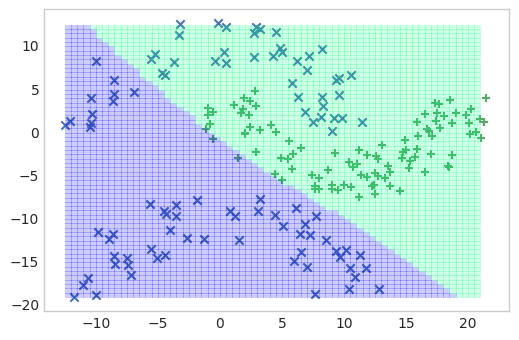

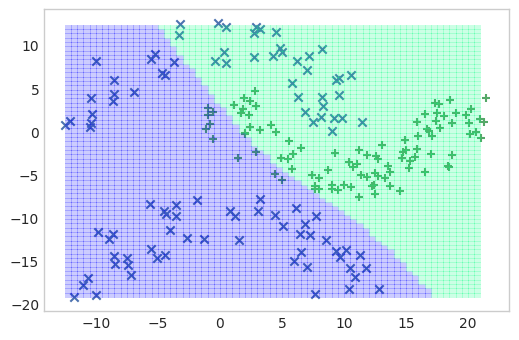

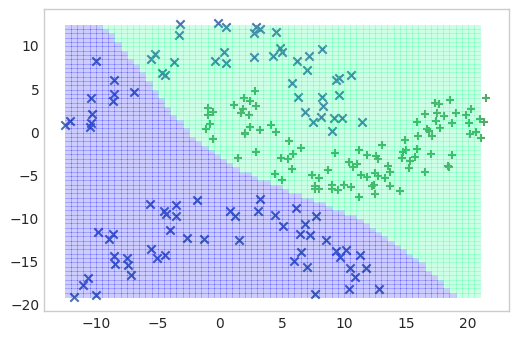

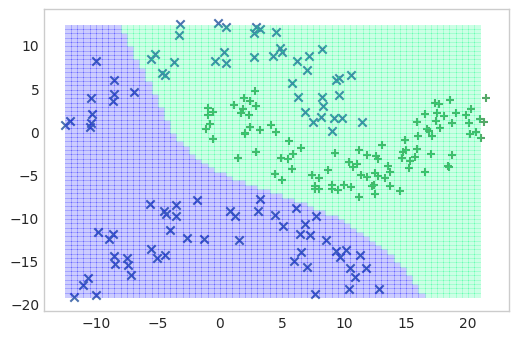

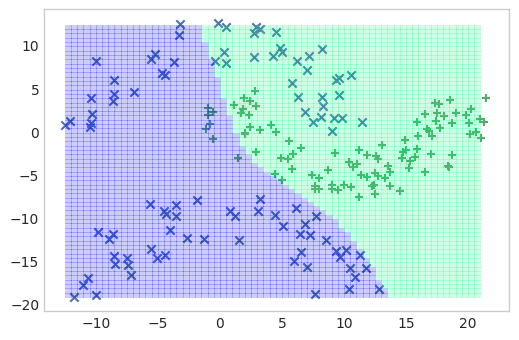

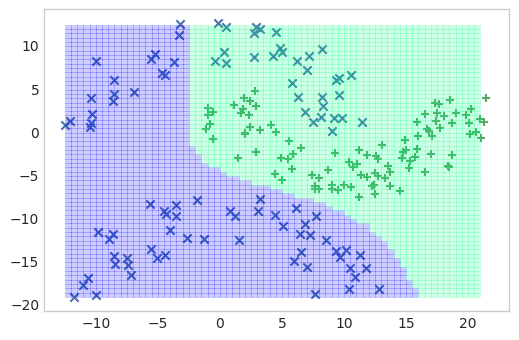

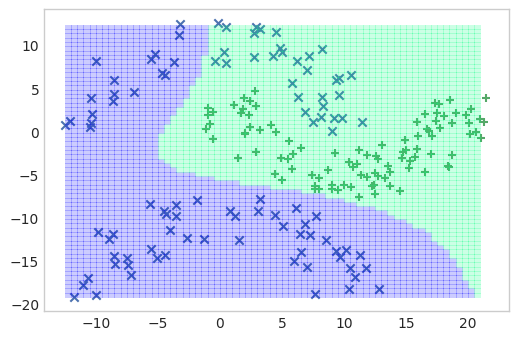

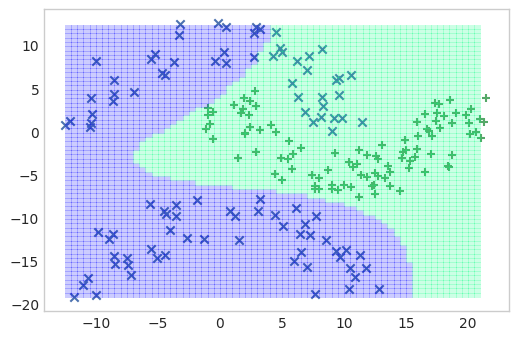

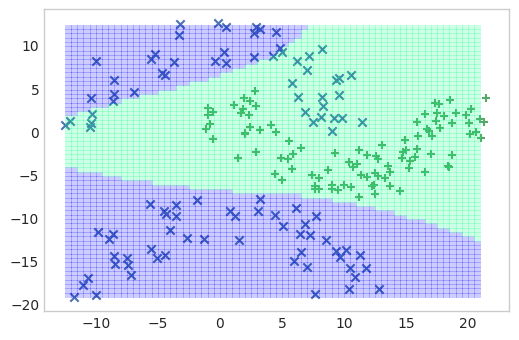

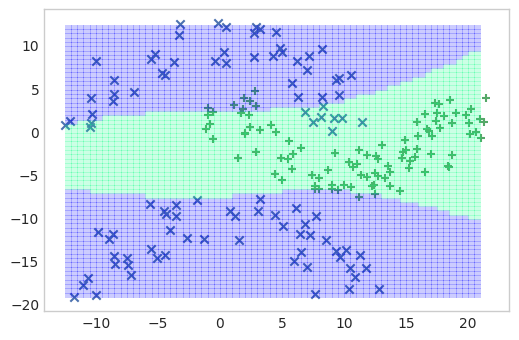

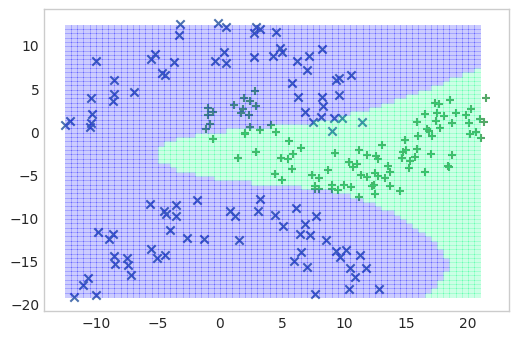

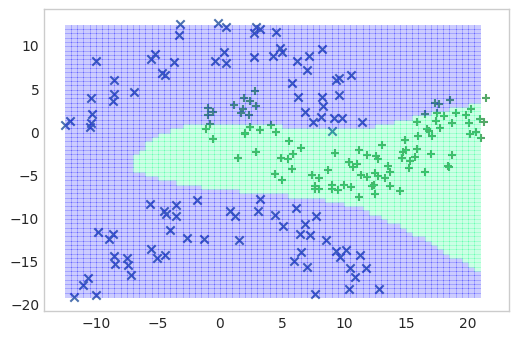

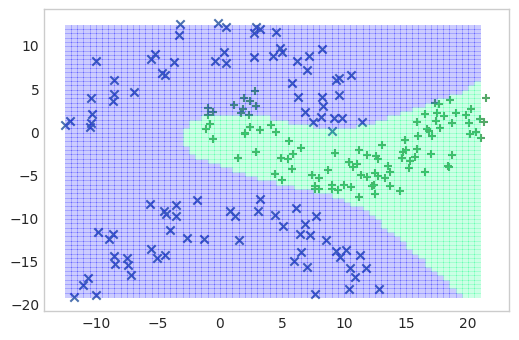

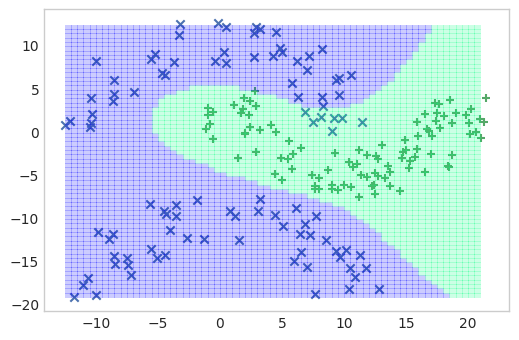

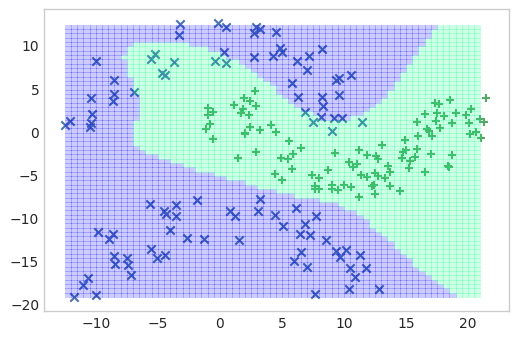

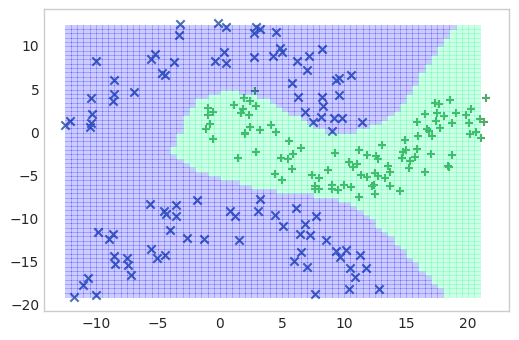

In [11]:
tf.reset_default_graph()

clf2 = circleClf2(max_epoch=50, normalize=True)
clf2.run(regionA, regionB, data_test, labels_test)

### 初期化を考えてみる

---

```
Assuming that no prior information is available, pick the synap- tic weights and thresholds from a uniform distribution whose mean is zero and whose variance is chosen to make the standard deviation of the induced local fields of the neu- rons lie at the transition between the linear and standards parts of the sigmoid activa- tion function.
```

Hyperbolic tangent を使う時のinduced local field が値がちょうど有効な範囲にくるであろう、初期値の設定
は

$$ \sigma_w = m^{-\frac{1}{2}} $$

ここで $m$ は前の層のユニット数


初期化はuniformがいいと言っているので、これらの事実からw1, b1, w2, b2の初期化範囲を定める

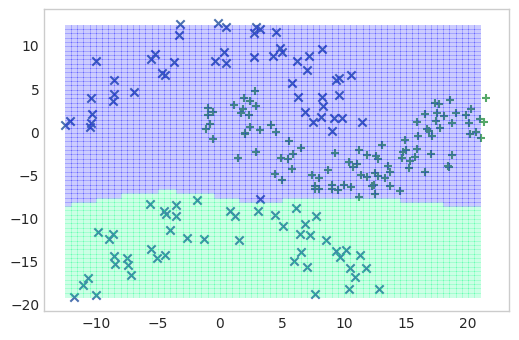

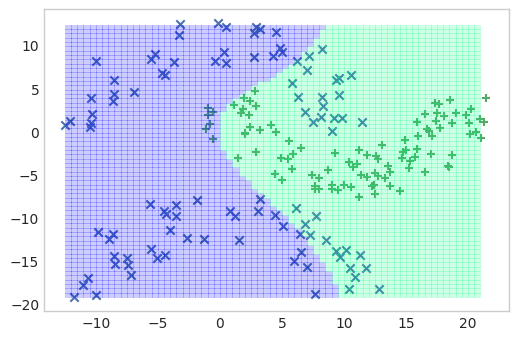

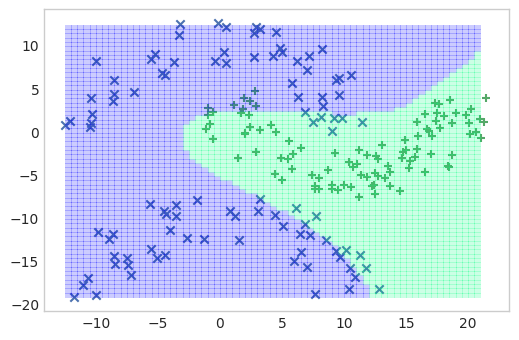

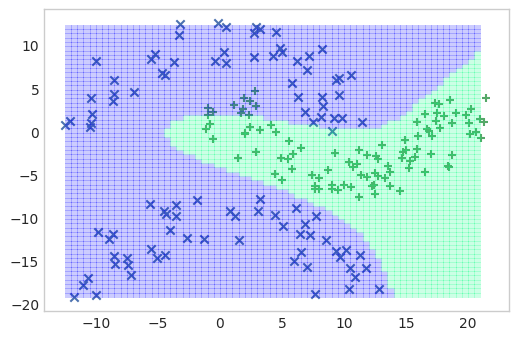

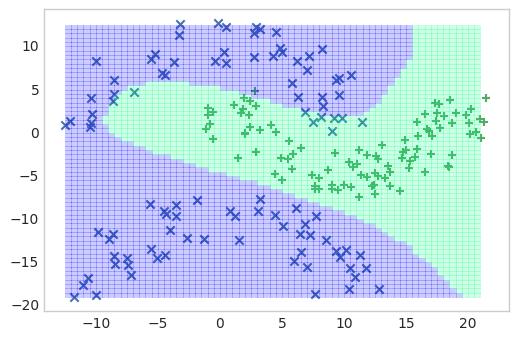

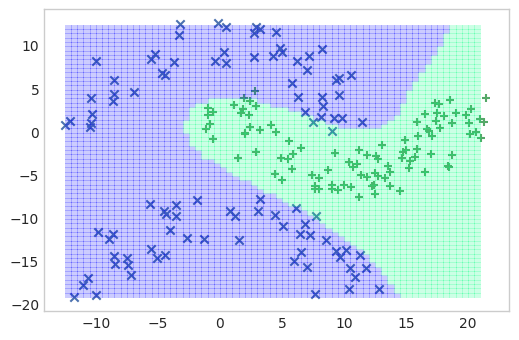

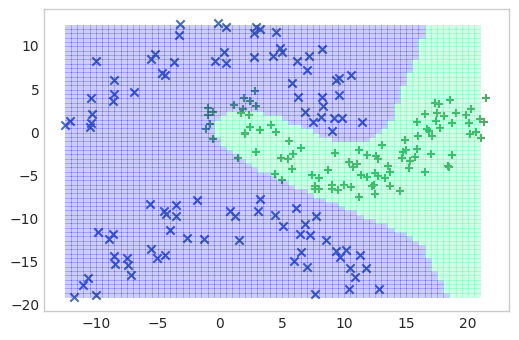

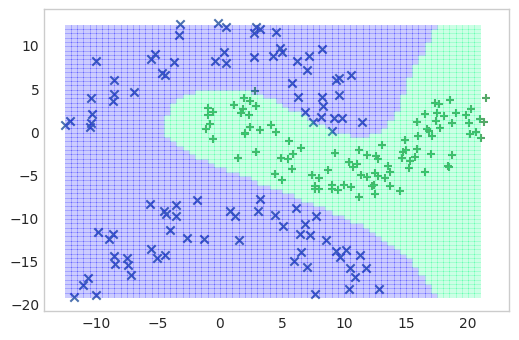

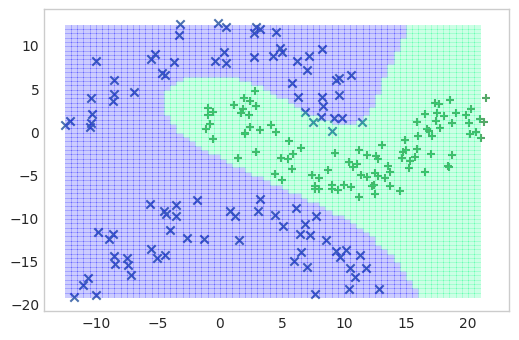

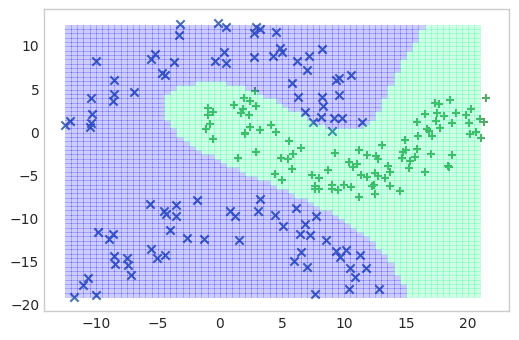

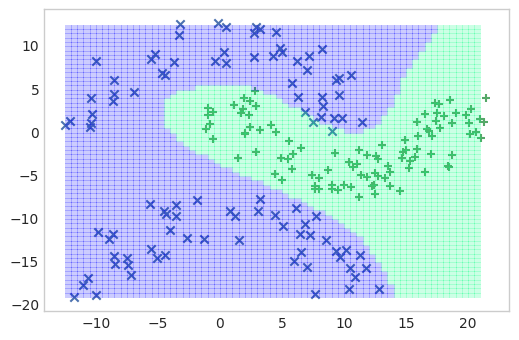

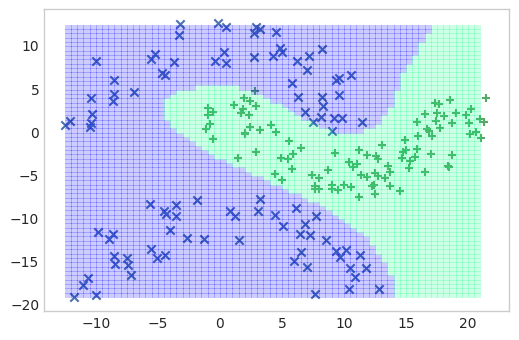

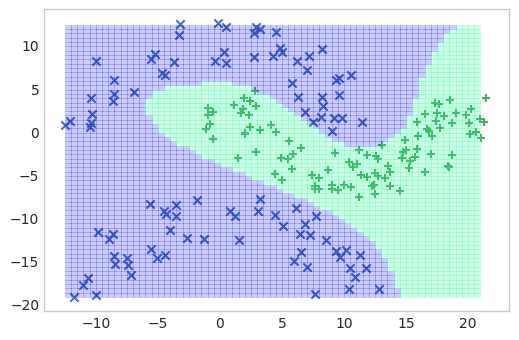

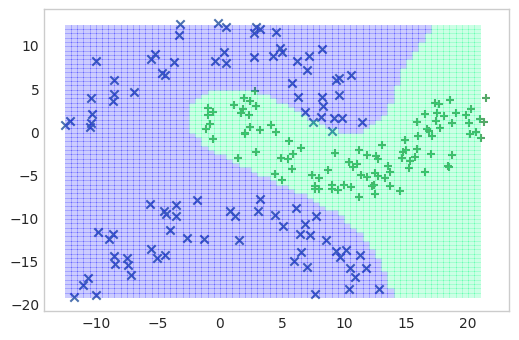

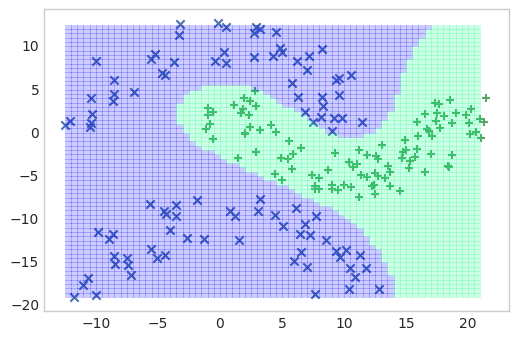

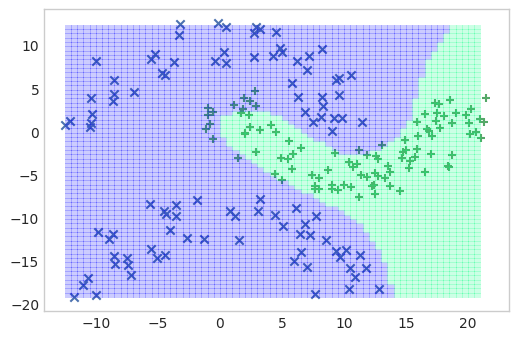

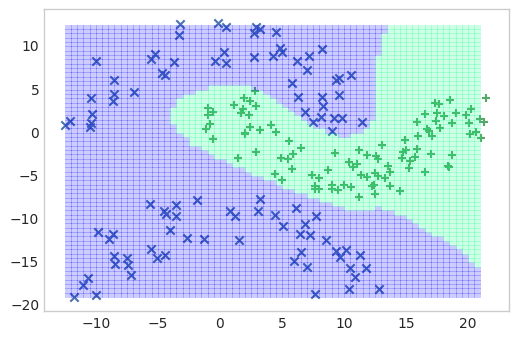

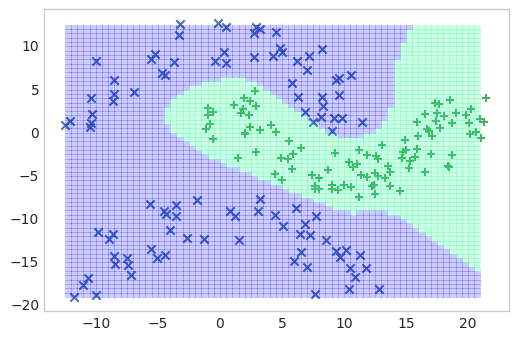

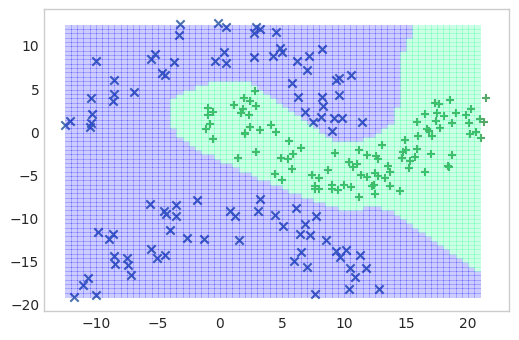

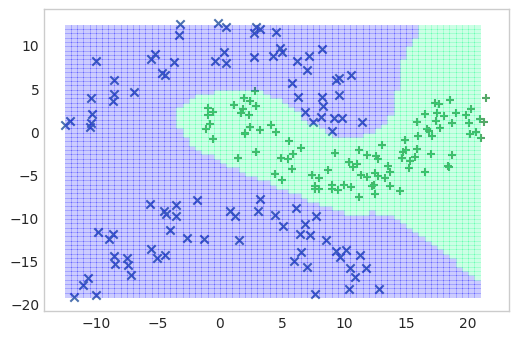

In [12]:
tf.reset_default_graph()

clf3 = circleClf3(max_epoch=50, normalize=True)
clf3.run(regionA, regionB, data_test, labels_test)

### 活性化関数 に ReLU(Rectified Linear Unit)

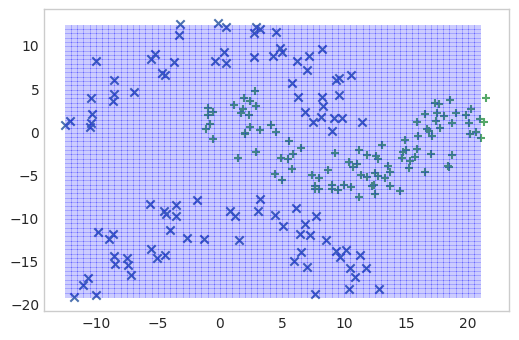

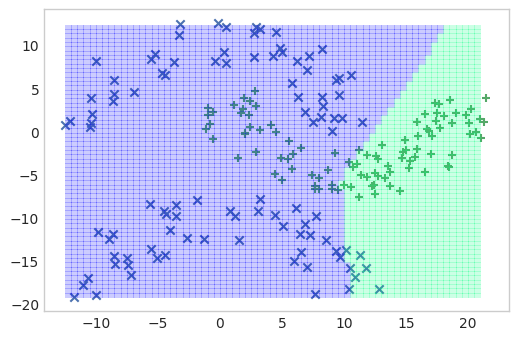

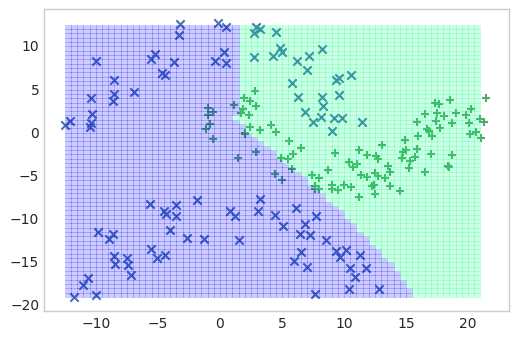

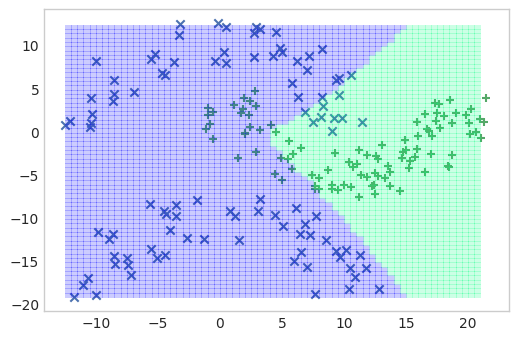

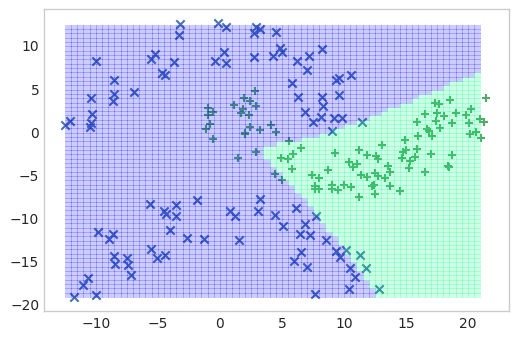

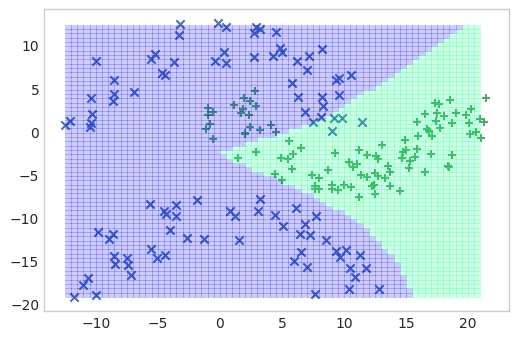

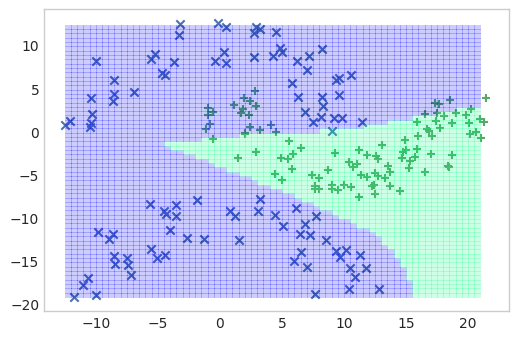

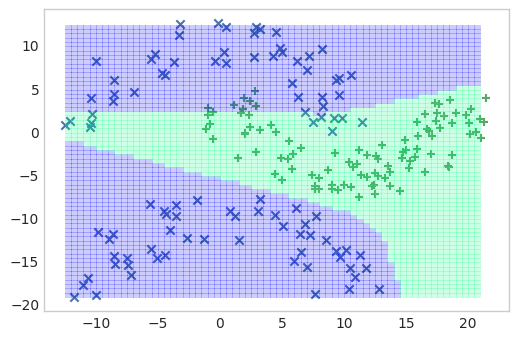

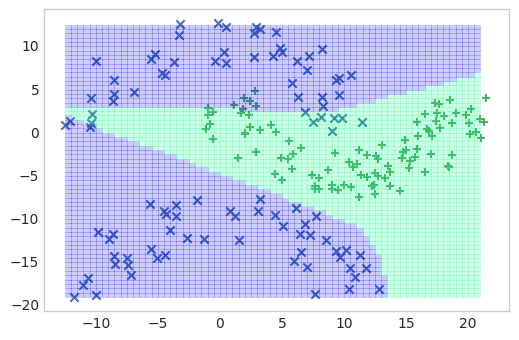

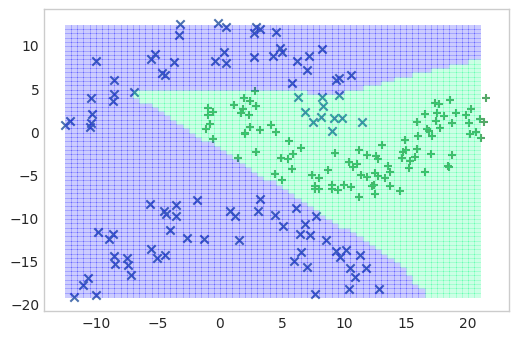

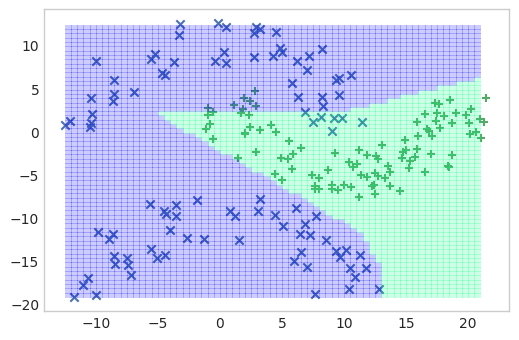

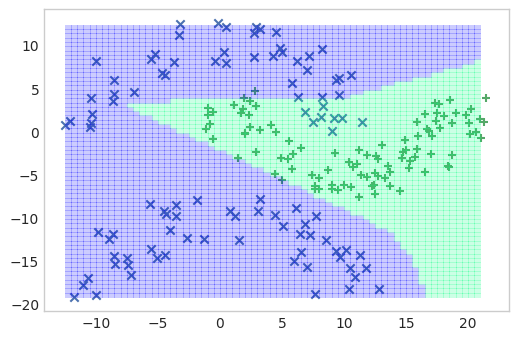

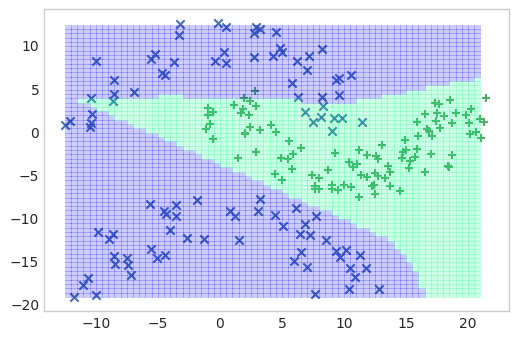

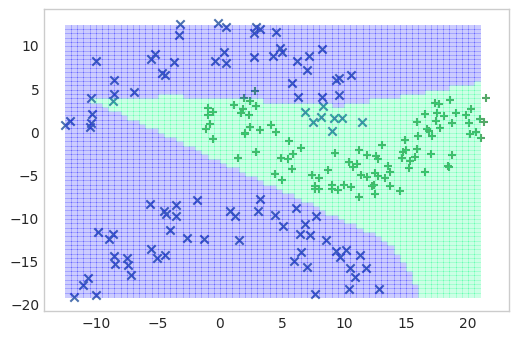

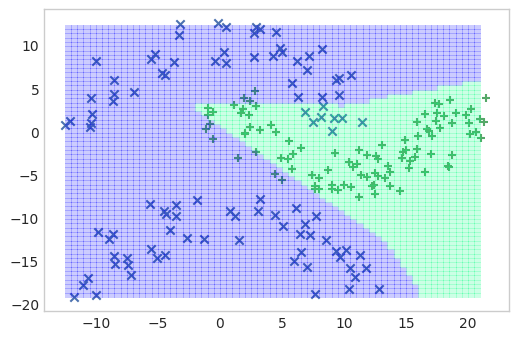

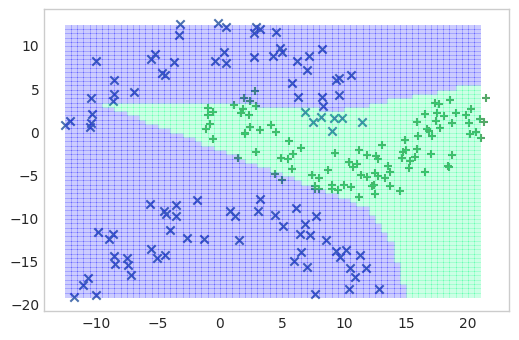

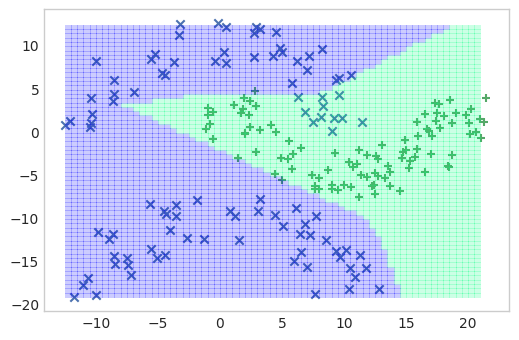

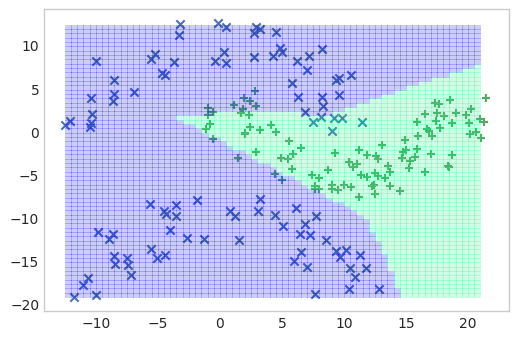

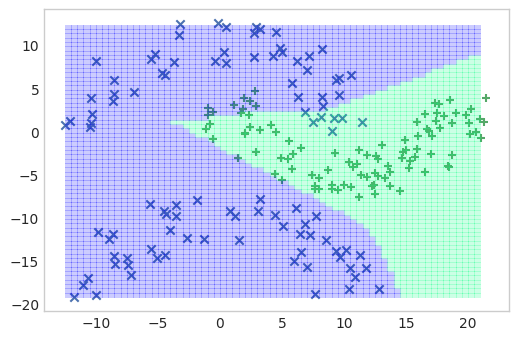

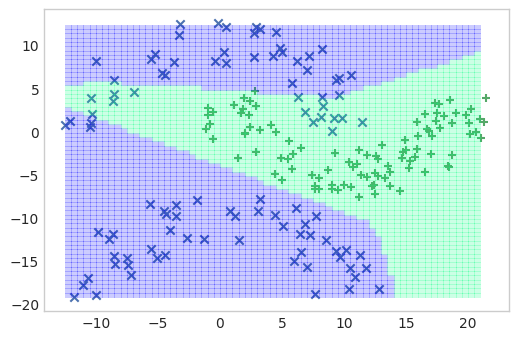

In [13]:
tf.reset_default_graph()

clf4 = circleClf4(max_epoch=50, normalize=True)
clf4.run(regionA, regionB, data_test, labels_test)

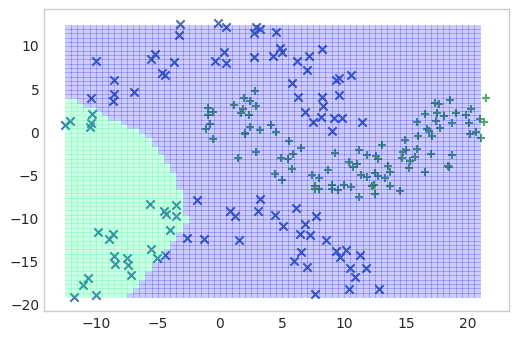

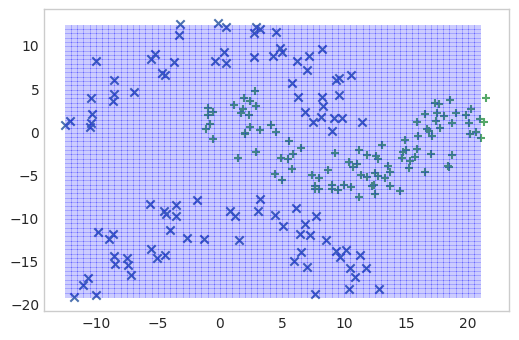

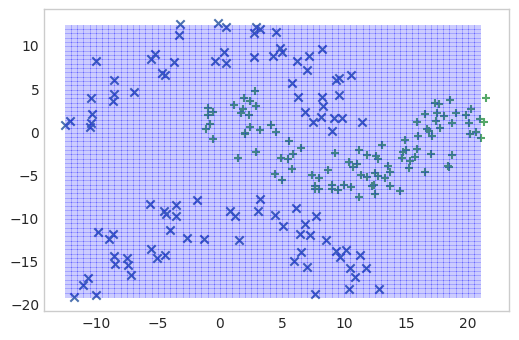

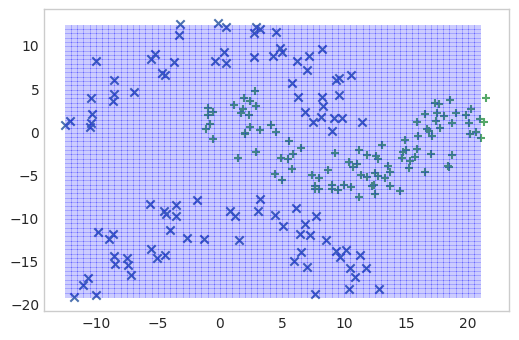

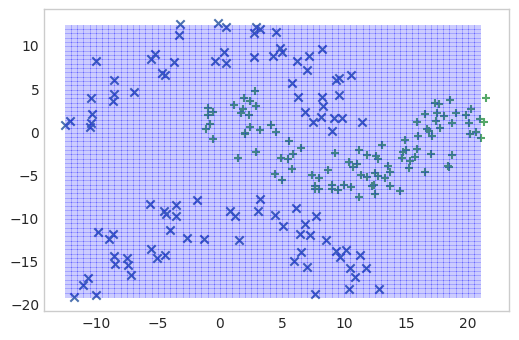

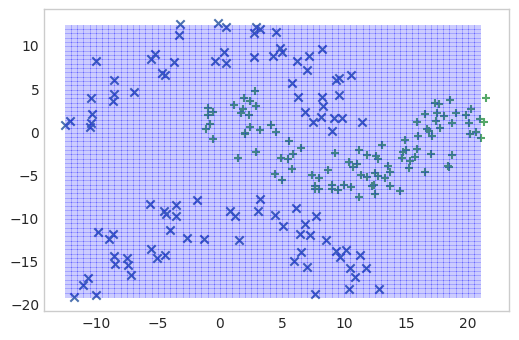

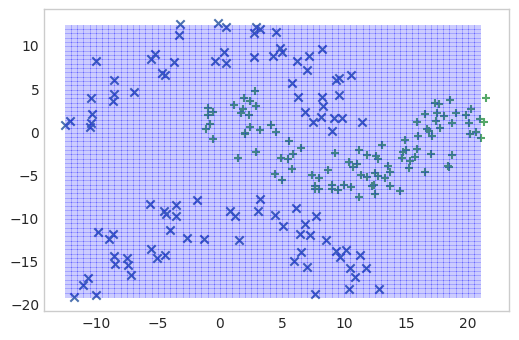

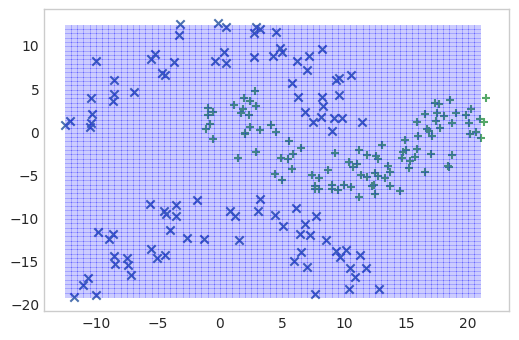

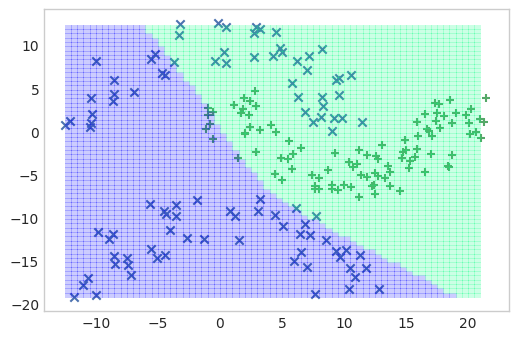

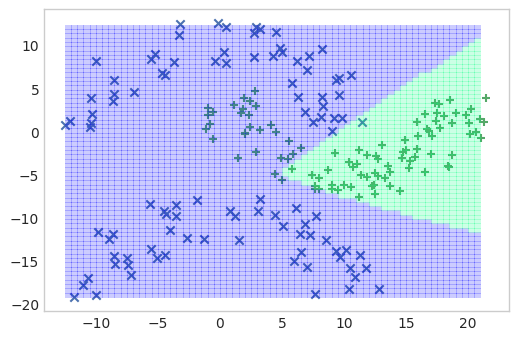

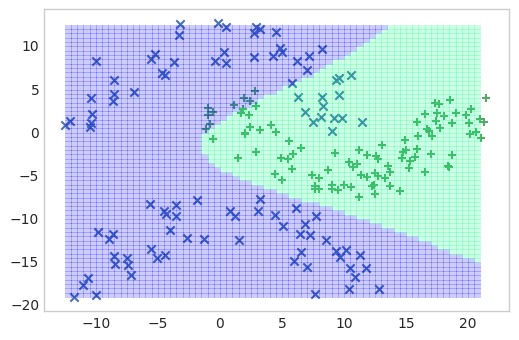

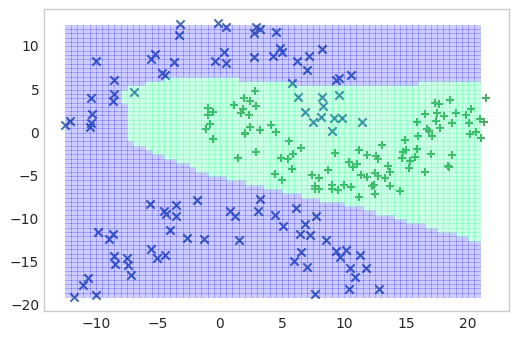

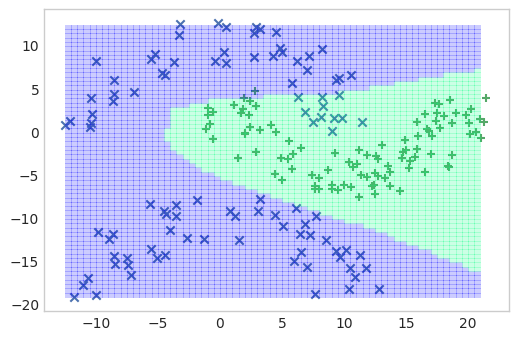

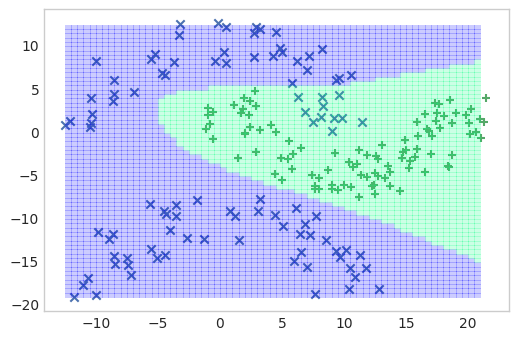

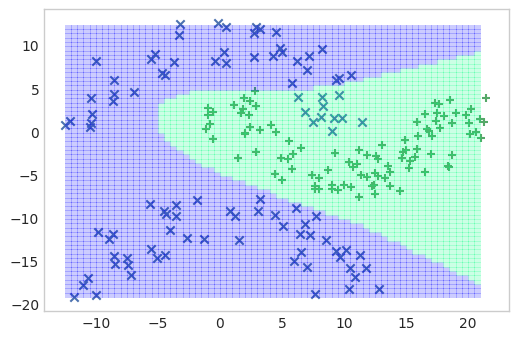

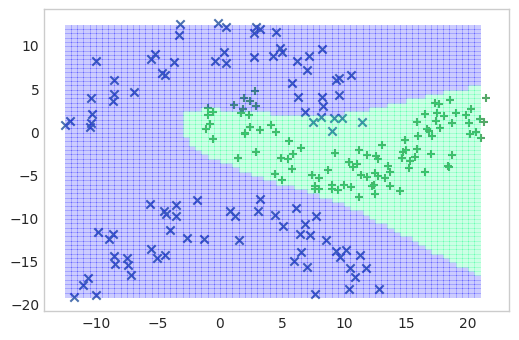

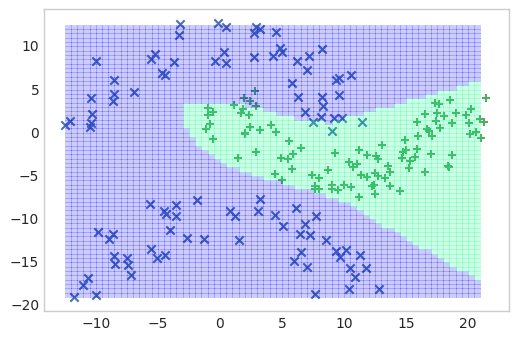

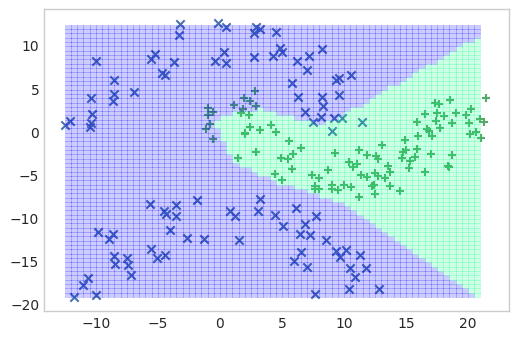

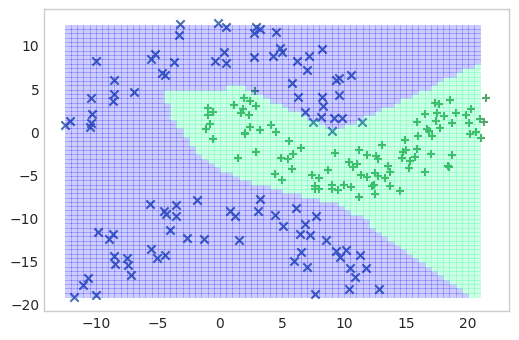

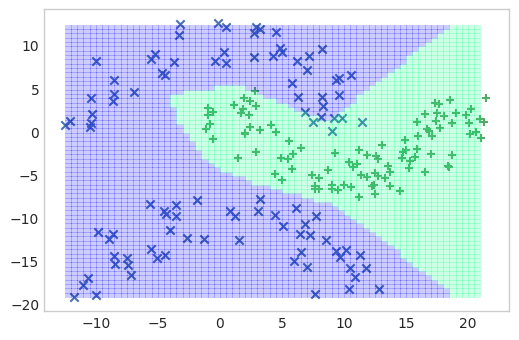

In [16]:
tf.reset_default_graph()

clf5 = circleClf5(max_epoch=50, normalize=True)
clf5.run(regionA, regionB, data_test, labels_test)